**Required package**
- MDAnalysis
- nglview
- joblib

In [1]:
import numpy as np
import glob
import os
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

import MDAnalysis as mda
from MDAnalysis.transformations.wrap import unwrap

import nglview as nv

import pandas as pd


#import gmxapi as gmx

In [2]:
import seaborn as sns
sns.set(style='whitegrid', context='poster', font_scale=1)
sns.despine()

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
sns.set_palette("Reds", 10)

In [4]:
import os
cwd = os.getcwd()

In [5]:
sim_folders = [
               '../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle'
               ]

In [6]:
sim_folders

['../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle']

In [7]:
import numpy as np
from fe_gmx import AWH_3D_Ensemble

In [8]:
awh_ensembles = {}
for sim_folder in sim_folders:
    print(sim_folder)
    awh_ensembles[sim_folder] = AWH_3D_Ensemble(sim_folder,
                                                regenerate_awh=True,
                                                stride=2)

../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle
Found 66 awh_pmf files.
The latest awh_pmf file is ../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/awh_result/awh_t130000.xvg
The latest awh_pmf file was generated at 2023-07-06 15:16:59
Found 8 walkers.
The latest walker was generated at 2023-06-19 11:19:04
Generating pulling data...
Generating dH/dl data...
Generating log data...
Generating PMF data...


Generating PMF data:   3%|▎         | 1/33 [00:00<00:12,  2.53it/s]

(105294, 9)
(105294, 9)


Generating PMF data:   9%|▉         | 3/33 [00:01<00:14,  2.04it/s]

(105294, 9)


Generating PMF data:  12%|█▏        | 4/33 [00:01<00:14,  2.06it/s]

(105294, 9)


Generating PMF data:  15%|█▌        | 5/33 [00:02<00:15,  1.78it/s]

(105294, 9)


Generating PMF data:  18%|█▊        | 6/33 [00:03<00:14,  1.85it/s]

(105294, 9)


Generating PMF data:  21%|██        | 7/33 [00:03<00:13,  1.93it/s]

(105294, 9)


Generating PMF data:  24%|██▍       | 8/33 [00:04<00:15,  1.61it/s]

(105294, 9)


Generating PMF data:  27%|██▋       | 9/33 [00:04<00:14,  1.70it/s]

(105294, 9)


Generating PMF data:  30%|███       | 10/33 [00:05<00:12,  1.85it/s]

(105294, 9)


Generating PMF data:  33%|███▎      | 11/33 [00:05<00:11,  1.86it/s]

(105294, 9)


Generating PMF data:  36%|███▋      | 12/33 [00:06<00:12,  1.69it/s]

(105294, 9)


Generating PMF data:  39%|███▉      | 13/33 [00:07<00:11,  1.78it/s]

(105294, 9)


Generating PMF data:  42%|████▏     | 14/33 [00:07<00:10,  1.84it/s]

(105294, 9)


Generating PMF data:  45%|████▌     | 15/33 [00:08<00:09,  1.82it/s]

(105294, 9)
(105294, 9)


Generating PMF data:  52%|█████▏    | 17/33 [00:09<00:08,  1.84it/s]

(105294, 9)


Generating PMF data:  55%|█████▍    | 18/33 [00:09<00:07,  1.92it/s]

(105294, 9)


Generating PMF data:  58%|█████▊    | 19/33 [00:10<00:07,  1.96it/s]

(105294, 9)


Generating PMF data:  61%|██████    | 20/33 [00:10<00:06,  2.00it/s]

(105294, 9)


Generating PMF data:  64%|██████▎   | 21/33 [00:11<00:06,  1.98it/s]

(105294, 9)


Generating PMF data:  67%|██████▋   | 22/33 [00:11<00:05,  2.04it/s]

(105294, 9)


Generating PMF data:  70%|██████▉   | 23/33 [00:12<00:04,  2.05it/s]

(105294, 9)


Generating PMF data:  73%|███████▎  | 24/33 [00:12<00:04,  2.05it/s]

(105294, 9)


Generating PMF data:  76%|███████▌  | 25/33 [00:13<00:03,  2.04it/s]

(105294, 9)


Generating PMF data:  79%|███████▉  | 26/33 [00:13<00:03,  2.05it/s]

(105294, 9)


Generating PMF data:  82%|████████▏ | 27/33 [00:14<00:02,  2.08it/s]

(105294, 9)


Generating PMF data:  85%|████████▍ | 28/33 [00:14<00:02,  2.03it/s]

(105294, 9)


Generating PMF data:  88%|████████▊ | 29/33 [00:15<00:01,  2.05it/s]

(105294, 9)
(105294, 9)


Generating PMF data:  94%|█████████▍| 31/33 [00:16<00:01,  1.97it/s]

(105294, 9)


Generating PMF data:  97%|█████████▋| 32/33 [00:16<00:00,  1.98it/s]

(105294, 9)


Generating PMF data: 100%|██████████| 33/33 [00:17<00:00,  1.93it/s]

(105294, 9)


In [9]:
[awh_ensemble.awh_log[0] for name, awh_ensemble in awh_ensembles.items()]

[AWH_LOG(filename=../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep1/awh.log, index=0), covering_times=[61980, 94220, 101160], equlibrated_histogram_time=61980, out_of_initial_stage_time=101160]

In [10]:
generate_video=False
if generate_video:
    for name, awh_ensemble in awh_ensembles.items():
        awh_ensemble.generate_pmf_video(
                                name='_'.join(name.split('/')[-2:]),
                                stride=1,
                                remove_img=True,
                                ffmpeg='/nethome/yzhuang/FFmpeg/ffmpeg'
        )

../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle
t128000


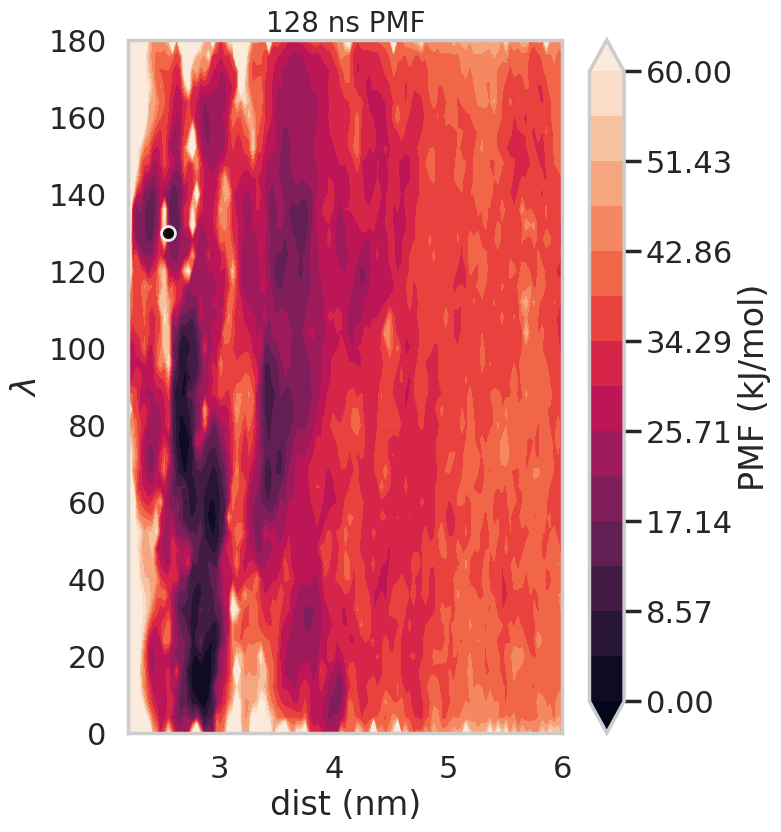

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds")

for name, awh_ensemble in awh_ensembles.items():
    print(name)
    time = awh_ensemble.awh_results.timeseries[-1]
    print(time)
    awh_pmf = awh_ensemble.awh_results.pmf[-1]

    awh_cv1 = awh_pmf.T[0][0][0]
    awh_cv2 = awh_pmf[0][0].T[2]
    awh_cv3 = awh_pmf[0][0].T[1]
    awh_fes = awh_pmf[:,0,:,3].T

    fig, ax = plt.subplots(figsize=(7,9))
    mappable = ax.contourf(
                awh_cv1,
                awh_cv2,
                awh_fes,
                vmax=60,
                levels=np.linspace(0, 60, 15),
                extend='both',)

    ax.set_ylabel(f'$\lambda$')
    ax.set_xlabel('dist (nm)')
    ax.set_title('{:.0f} ns PMF'.format(eval(time[1:]) / 1000), fontsize=20)
    cbar = fig.colorbar(mappable)

    cbar.set_label(f'PMF ({awh_ensemble.unit})')

    ax.scatter(awh_ensemble.awh_pullx[0].data.dim_7[0],
                awh_ensemble.awh_pullx[0].data.dim_10[0],
                marker='o',
                color='black',
                alpha=0.9,
                edgecolors='white',
                s=100,
                label='start')
    plt.show()

In [15]:
import dask
from dask.distributed import Client, LocalCluster

In [16]:
from ENPMDA import MDDataFrame
from ENPMDA.preprocessing import TrajectoryEnsemble

In [17]:
cluster = LocalCluster(n_workers=16,
                       scheduler_port=8789,
                       memory_limit='4GB')

In [18]:
client = Client(cluster)

In [19]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 32,Total memory: 59.60 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:8789,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 59.60 GiB
Comm: tcp://127.0.0.1:34491,Total threads: 2
Dashboard: http://127.0.0.1:39141/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:44907,


In [20]:
trajectory_list = []
topology_list = []
bonded_topology_list = []

In [21]:
default_raw_load_location = '/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS/'
#default_raw_load_location = '/mnt/cephfs/projects/2022032200_nachrs_modulator/AWH_2D/test/ANALYSIS/'

for folder in awh_ensemble.rep_folder:
    load_location = f'{default_raw_load_location}/{folder}'

    if not os.path.exists(load_location + '/../../start.pdb'):
        raise FileExistsError(load_location + '/../../start.pdb')
    trajectory_list.append(load_location +  "/awh.xtc")
    topology_list.append(load_location + '/../../start.pdb')
    bonded_topology_list.append(load_location + "/awh.tpr")

In [22]:
trajectory_ensemble = TrajectoryEnsemble(ensemble_name='awh_3d_ensemble',
                                         trajectory_list=trajectory_list,
                                         topology_list=topology_list,
                                         bonded_topology_list=bonded_topology_list,
                                         skip=1,
                                         updating=False,
                                         only_raw=False,
                                         protein_selection='protein or resname EPJ'
                                         )
trajectory_ensemble.load_ensemble()

/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep1/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep2/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep3/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep4/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep5/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep6/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep7/awh.xtc new
/nethome/yzhuang/cephfs/nachrs_modulator/AChBP/ANALYSIS//../3SQ6_wyf_modified_new/AWH_2D_FEP_pore_angle/rep8/awh.xtc new
dask finished
pickle raw_traj un

In [23]:
from ENPMDA.analysis.base import DaskChunkMdanalysis

In [24]:
md_dataframe = MDDataFrame(dataframe_name='awh_3d_ensemble')
md_dataframe.add_traj_ensemble(trajectory_ensemble,
                            npartitions=30,
                            stride=1)

Requested number of partitions:  30


In [25]:
print(f"Number of frames in the dataframe is {len(md_dataframe.dataframe)}")
print(f"dt in the dataframe is {md_dataframe.dataframe.traj_time.diff()[1] /1000} ns")
print(f"Number of systems in the dataframe is {len(md_dataframe.dataframe.system.unique())}")
print(f"Existing features are {md_dataframe.dataframe.columns}")

Number of frames in the dataframe is 10472
dt in the dataframe is 0.1 ns
Number of systems in the dataframe is 8
Existing features are Index(['universe_protein', 'universe_system', 'system', 'traj_name', 'frame',
       'traj_time', 'stride'],
      dtype='object')


In [26]:
u = mda.Universe('../3SQ6_wyf_modified_new/start.pdb')

ag_lig_1 = u.select_atoms('resname EPJ and not name CLA').split('residue')[0]

prot_binding_site = u.select_atoms('name CA and byres (protein and around 4 group ag_lig_1)', ag_lig_1=ag_lig_1)

#sort prot_resids
chain_resids = prot_binding_site.segids[np.argsort(prot_binding_site.resids)]
prot_resids = np.sort(prot_binding_site.resids)

prot_resids = prot_resids[np.argsort(chain_resids)]
chain_resids = np.sort(chain_resids)

print(prot_resids)
print(chain_resids)

next_subunit_dict = {'A': 'B',
                     'B': 'C',
                     'C': 'D',
                     'D': 'E',
                     'E': 'A',
                     }

prot_selections = []

for i in range(5):
    # only makes senses for homomers
    selection = 'protein and ('
    for j in range(prot_resids.shape[0]):
        # iterate subunit
        selection += f'(resid {prot_resids[j]} and segid {chain_resids[j]}) or '
        chain_resids[j] = next_subunit_dict[chain_resids[j]]
    selection = selection[:-4] + ')'
    prot_selections.append(selection)

[ 91 144 145 146 184 186 187 191  53 104 105 106 114 115 116]
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B']


In [40]:
from MDAnalysis.analysis.distances import distance_array

class get_loopc_dynamics(DaskChunkMdanalysis):
    name = 'loopC'
    universe_file = 'protein'

    def set_feature_info(self, universe):
        return ['chn_{}'.format(i) for i in range(5)]

    def run_analysis(self, universe, start, stop, step):
        binding_sites = []
        ch_1_loopc = universe.select_atoms('segid A and resid 176-195 and name CA')
        ch_2_loopc = universe.select_atoms('segid B and resid 176-195 and name CA')
        ch_3_loopc = universe.select_atoms('segid C and resid 176-195 and name CA')
        ch_4_loopc = universe.select_atoms('segid D and resid 176-195 and name CA')
        ch_5_loopc = universe.select_atoms('segid E and resid 176-195 and name CA')

        for selection in prot_selections:
            binding_sites.append(universe.select_atoms(selection))

        loopC_sites = [ch_1_loopc, ch_2_loopc, ch_3_loopc, ch_4_loopc, ch_5_loopc]
        result = []
        for ts in universe.trajectory[start:stop:step]:
            distances = []
            for loopc, bs in zip(loopC_sites, binding_sites):
                loopC_coord = loopc.center_of_mass()[:2]
                bs_coord = bs.center_of_mass()[:2]
                distances.append(np.linalg.norm(loopC_coord - bs_coord))
            result.append(distances)
        return result

In [41]:
md_dataframe.add_analysis(get_loopc_dynamics, overwrite=True)

Analysis loopC overwritten


/tmp/ipykernel_62611/3929401042.py:1: UserWarning: Analysis loopC overwrites!
  md_dataframe.add_analysis(get_loopc_dynamics, overwrite=True)


In [42]:
md_dataframe.sort_analysis_result()

Requested number of partitions:  30
start to sort loopC.
loopC sorted.
Requested number of partitions:  30
Saving sorted results to awh_3d_ensemble


In [43]:
md_dataframe.save('awh_3d_ensemble')

No changes


In [44]:
feature_dataframe = md_dataframe.get_feature([
                        'loopC',
                        ])

Loading feature loopC: 100%|██████████| 8/8 [00:00<00:00, 260.35it/s]


<Axes: xlabel='loopC_chn_0', ylabel='Probability'>

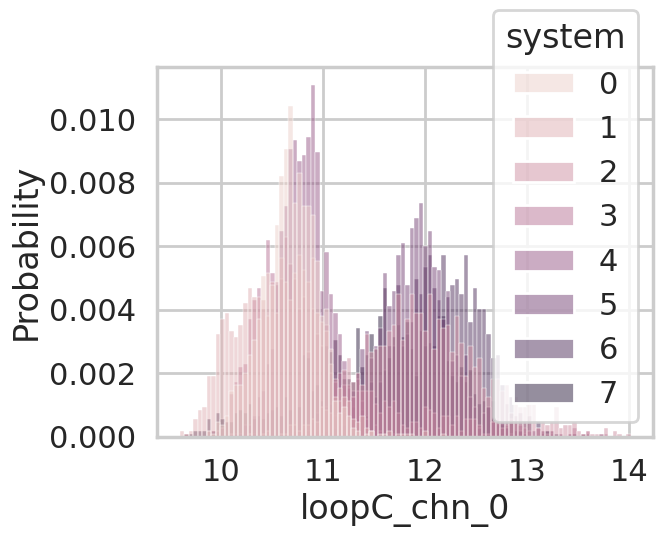

In [45]:
sns.histplot(data=feature_dataframe,
             x='loopC_chn_0',
             hue='system', bins=100, stat='probability')

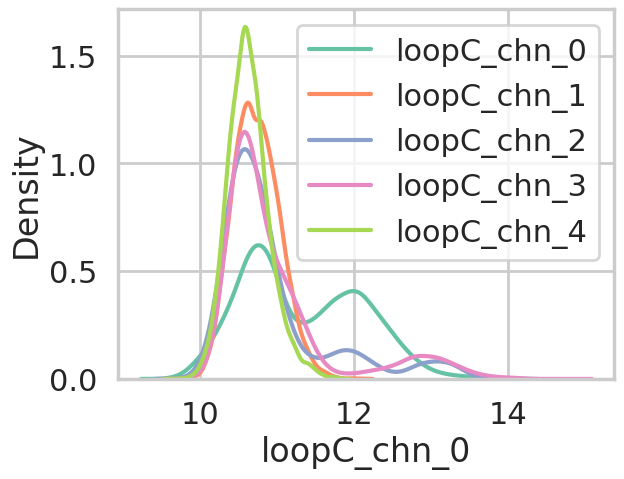

In [46]:
sns.set_palette('Set2')
for loop_feat in [f'loopC_chn_{sub}' for sub in range(5)]:
    sns.kdeplot(data=feature_dataframe,
             x=loop_feat, legend=True, label=loop_feat)
plt.legend()

<Axes: xlabel='frame', ylabel='loopC_chn_3'>

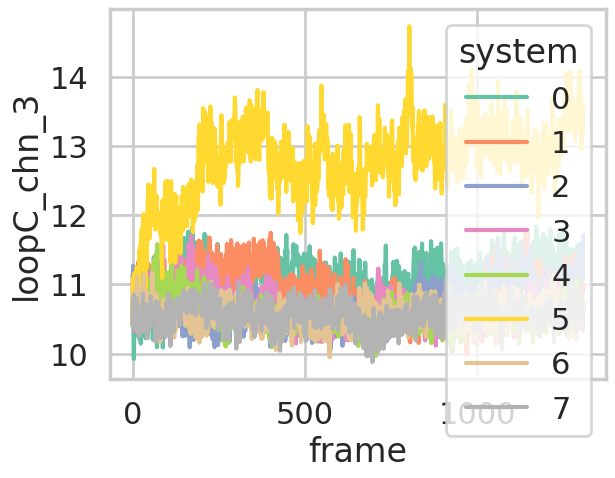

In [57]:
sns.set_palette('Set2', 8)
sns.lineplot(data=feature_dataframe,
             x='frame',
             y='loopC_chn_3',
             hue='system',
             palette='Set2',)

<Axes: xlabel='frame', ylabel='loopC_chn_0'>

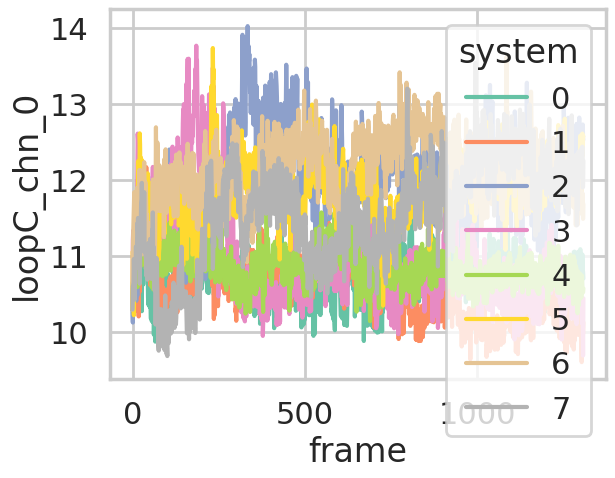

In [58]:
sns.set_palette('Set2', 8)
sns.lineplot(data=feature_dataframe,
             x='frame',
             y='loopC_chn_0',
             hue='system',
             palette='Set2',)

In [64]:
data

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10
0,0.0,0.089822,0.074245,0.070840,0.061109,0.042652,2.55045,0.377096,0.043478,129.8830
1,2.0,0.093590,0.074898,0.114888,0.106878,0.106652,2.59903,0.095234,0.037207,129.6650
2,4.0,0.100378,0.081930,0.047380,0.115721,0.117000,2.61631,0.500464,0.042584,126.1020
3,6.0,0.145988,0.109173,0.099691,0.100732,0.109227,2.65436,0.282222,0.057241,133.1060
4,8.0,0.126267,0.087075,0.066776,0.067969,0.077537,2.64474,0.384069,0.057519,124.8410
...,...,...,...,...,...,...,...,...,...,...
65412,130824.0,3.062250,0.115071,0.097721,0.097696,0.078192,5.55753,13.874800,0.393922,76.1216
65413,130826.0,2.912250,0.125199,0.094960,0.144121,0.090247,5.45585,11.369100,0.281213,98.0929
65414,130828.0,2.656620,0.114485,0.098664,0.102984,0.071389,5.22186,10.289700,0.237985,105.6080
65415,130830.0,2.924230,0.107852,0.093087,0.120912,0.093844,5.41251,12.818800,0.547498,125.8630


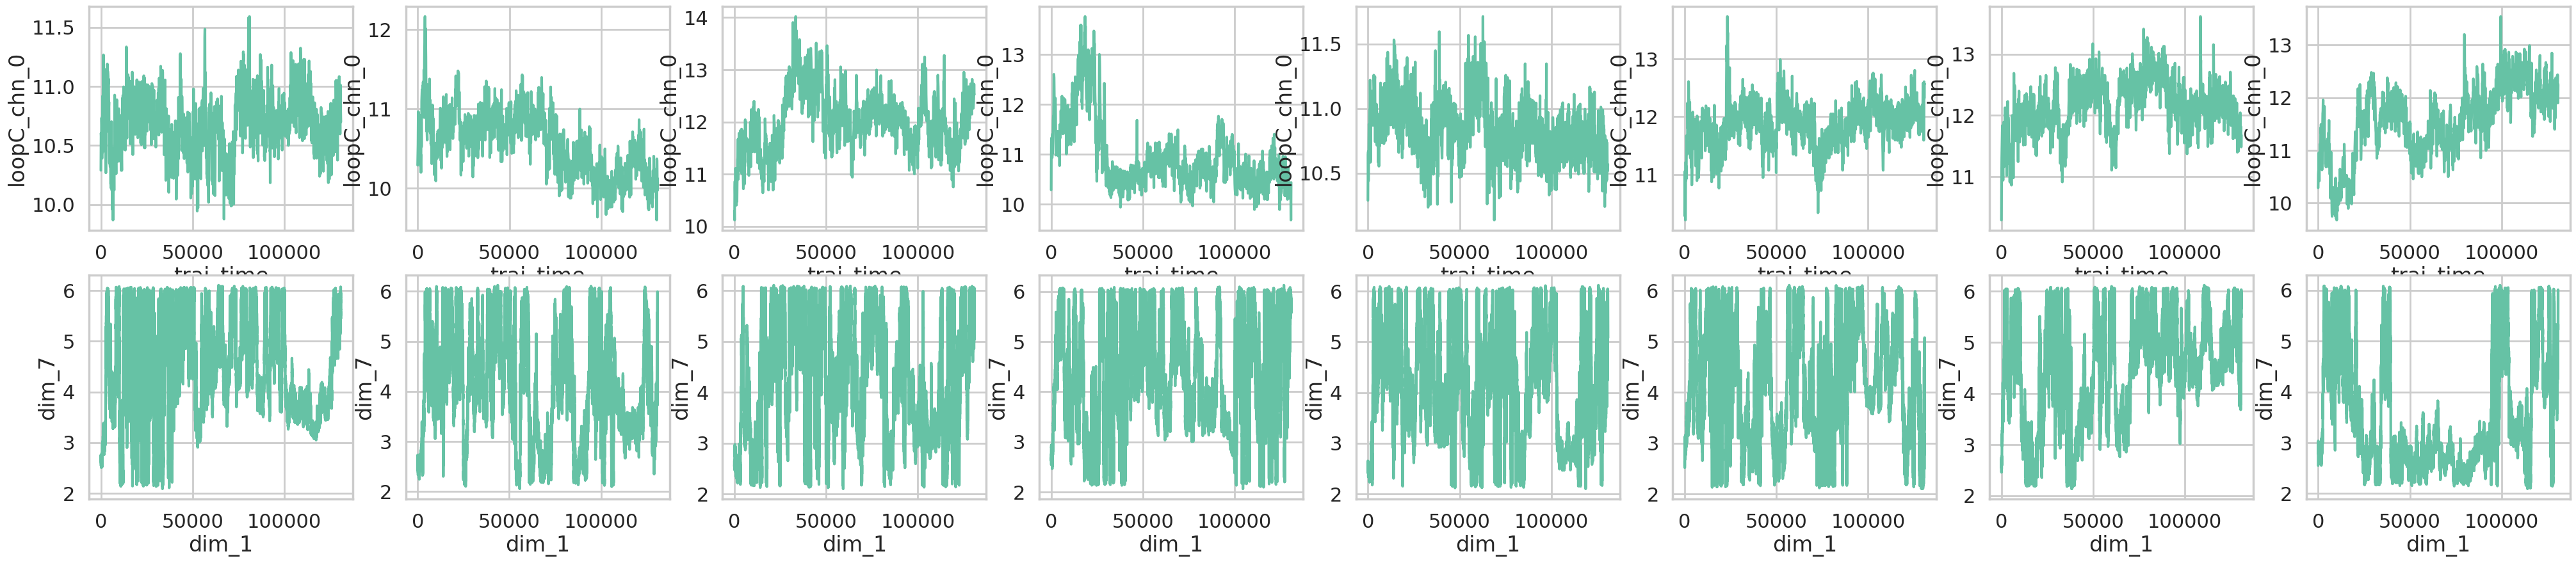

In [70]:
fig, axes = plt.subplots(2,8,figsize=(50, 10))

for system, pullx in enumerate(awh_ensemble.awh_pullx):
    axes_row = axes.T[system]
    data = pullx.data
    sns.lineplot(data=feature_dataframe.query(f'system == {system}'),
                x='traj_time',
                y='loopC_chn_0',
                ax=axes_row[0])
    sns.lineplot(data=data,
                x='dim_1',
                y='dim_7',
                ax=axes_row[1])